### DATA 620

#### Week Five - Part 2 - Assignment: Document Classification


##### Group Four

- Santosh Cheruku
- Vinicio Haro
- Javern Wilson
- Saayed Alam

For this project, we will use the [UCI Machine Learning Repository: Spambase Data Set](http://archive.ics.uci.edu/ml/datasets/Spambase) to predict the class of new documents that are withheld from the training dataset as spam or non-spam.

In [81]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from yellowbrick.classifier import ClassificationReport


Import Spambase data file for processing into a pandas dataframe.

In [82]:
path = 'C:/Users/Javern/Documents/Data Science MS/DATA620/Week 5/spambase/spambase.data'
spambase = pd.read_csv(path, sep=",", header=None)

Rename columns. The names for the columns were taken from the spambase.names file

In [83]:
names = ["word_freq_make", 
 "word_freq_address", 
 "word_freq_all", 
 "word_freq_3d", 
 "word_freq_our", 
 "word_freq_over", 
 "word_freq_remove", 
 "word_freq_internet",
 "word_freq_order",        
 "word_freq_mail",         
 "word_freq_receive",      
 "word_freq_will",     
 "word_freq_people",
 "word_freq_report",       
 "word_freq_addresses",    
 "word_freq_free",       
 "word_freq_business",     
 "word_freq_email",        
 "word_freq_you",         
 "word_freq_credit",       
 "word_freq_your",         
 "word_freq_font",         
 "word_freq_000",          
 "word_freq_money",        
 "word_freq_hp",           
 "word_freq_hpl",          
 "word_freq_george",       
 "word_freq_650",          
 "word_freq_lab",          
 "word_freq_labs",         
 "word_freq_telnet",       
 "word_freq_857",          
 "word_freq_data",         
 "word_freq_415",          
 "word_freq_85",           
 "word_freq_technology",   
 "word_freq_1999",         
 "word_freq_parts",        
 "word_freq_pm",           
 "word_freq_direct",       
 "word_freq_cs",           
 "word_freq_meeting",      
 "word_freq_original",     
 "word_freq_project",      
 "word_freq_re",           
 "word_freq_edu",          
 "word_freq_table",        
 "word_freq_conference",   
 "char_freq_;",            
 "char_freq_(",            
 "char_freq_[",            
 "char_freq_!",            
 "char_freq_$",            
 "char_freq_#",            
 "capital_run_length_average",
 "capital_run_length_longest",
 "capital_run_length_total",
 "spam"]
spambase.columns = names

Below is a view of the final dataframe. The features of the first 5 emails are shown.

In [84]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [85]:
spambase['spam'] = spambase['spam'].replace([0], 'email') #change 0's to email indicating not a spam
spambase['spam'] = spambase['spam'].replace([1], 'spam') # change 1's to spam indicating a spam


Before splitting the data into training and test sets, we had to explicitly specify the independent and dependant variables before going forward. Spam is the outcome of the email we wish to predict so we separated this column from the others in the spambase dataset. The variable target or label will hold the spam observations while features will contain data for the other variables.


In [86]:
target = spambase['spam']
features = spambase.drop('spam', axis=1)

The data is split where 20% is witheld in the test set and 80% for the training data

In [87]:
feat_train, feat_test, targ_train, targ_test = train_test_split(features, target,test_size=0.2, random_state = 42)

In [88]:
feat_train.shape

(3680, 57)

In [89]:
feat_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1370,0.09,0.0,0.09,0.0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.0,0.000,0.139,0.0,0.310,0.155,0.0,6.813,494,1458
3038,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.124,0.124,0.0,0.000,0.000,0.0,1.800,8,45
2361,0.00,0.0,2.43,0.0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.0,0.000,0.344,0.0,0.000,0.000,0.0,2.319,12,167
156,0.00,0.0,0.00,0.0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.0,0.000,0.000,0.0,0.117,0.117,0.0,48.500,186,291
2526,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,2.307,8,30


In [90]:
feat_test.shape

(921, 57)

In [91]:
feat_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.000,1,3
4412,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.00,0.0,0.71,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.032,2,32
2584,0.00,0.0,0.91,0.0,0.0,0.0,0.0,0.45,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.320,7,103
69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.201,0.000,0.0,0.1,0.0,4.548,59,141
1844,0.00,0.0,0.54,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.188,0.047,0.0,0.0,0.0,1.745,12,89


#### Implementing Models: Gaussian Naive Bayes and LinearSVC

Gaussian

Gaussian Naive Bayes is an intuitive method that uses the probabilities of each attribute belonging to each class to make predictions and assumes that the features follow a normal distribution. This type of NB classifier is useful when working with continuous values which is what is contained in this dataset.

In [92]:
#Create a Gaussian Classifier
spam_model = GaussianNB()

# Train the model using the training sets 
spam_model.fit(feat_train, targ_train)

#Predict outcome of the emails 
predicted = spam_model.predict(feat_test)


In [93]:
gauss_result = pd.DataFrame()
gauss_result['Actual'] = list(targ_test)
gauss_result['Predicted'] = list(predicted)
gauss_result.head(10)

,Actual,Predicted
0,email,spam
1,email,email
2,email,email
3,spam,spam
4,email,email
5,spam,spam
6,email,email
7,email,email
8,email,email
9,email,spam


In [94]:
print("Gaussian Naive-Bayes Accuracy : ", accuracy_score(targ_test, predicted, normalize = True))

Gaussian Naive-Bayes Accuracy :  0.8208469055374593


LinearSVC

LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. LinearSVC tries to divide the data into different planes so that it can find a best fit or best possible grouping of different classes. In other words, based on the features provided the linearSVC algorithm would try to predict the best label for the emails (email or spam)

In [95]:
#create an object of type LinearSVC
svc_spam_model = LinearSVC(random_state=0)

#train the algorithm on training data 
svc_spam_model.fit(feat_train, targ_train)

#predict using the testing data
predictedSVC = svc_spam_model.predict(feat_test)

C:\Users\Javern\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [96]:
svc_result = pd.DataFrame()
svc_result['Actual'] = list(targ_test)
svc_result['Predicted'] = list(predictedSVC)
svc_result.head(10)

,Actual,Predicted
0,email,email
1,email,email
2,email,email
3,spam,spam
4,email,email
5,spam,email
6,email,email
7,email,email
8,email,email
9,email,email


In [97]:
#print the accuracy score of the model
print("LinearSVC accuracy : ", accuracy_score(targ_test, predictedSVC, normalize = True))

LinearSVC accuracy :  0.8762214983713354


#### Performance of models

Gaussian Naive Bayes

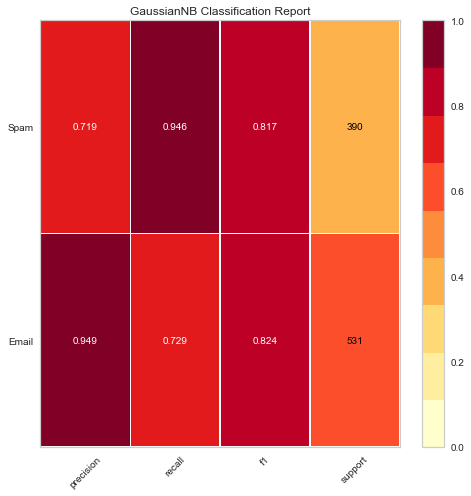

In [98]:
#plot size
plt.figure(figsize=(7, 7))
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(spam_model, classes=['Email','Spam'], support = True)
visualizer.fit(feat_train, targ_train) # Fit the training data to the visualizer
visualizer.score(feat_test, targ_test) # Evaluate the model on the test data
visualizer.poof() # Draw results

LinearSVC

C:\Users\Javern\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


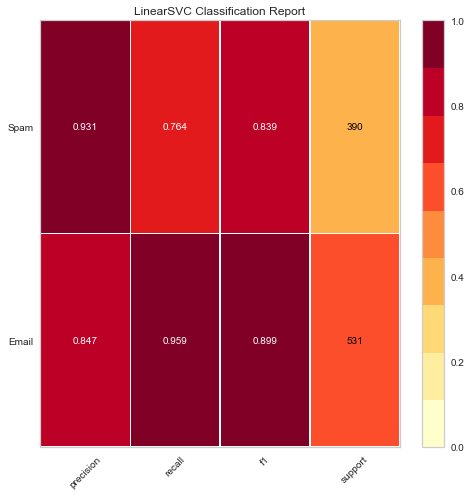

In [99]:
plt.figure(figsize=(7, 7))
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_spam_model, classes=['Email','Spam'], support = True)
visualizer.fit(feat_train, targ_train) # Fit the training data to the visualizer
visualizer.score(feat_test, targ_test) # Evaluate the model on the test data
visualizer.poof() # Draw results

For classification reports, darker colors represent higher percentages and darker colors are better.  It is very evident that the model LinearSVC model performed better than Gaussian Naive Bayes model. This was proven earlier when the accuracy scores were calculated.

##### Sources

- https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
- https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
- https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/